# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define your API key obtained from OpenWeatherMap
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to the OpenWeatherMap API
        response = requests.get(city_url)
        
        # If the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Convert Unix timestamp to a human-readable date
            city_date_readable = datetime.datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')

            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date_readable})
        else:
            print(f"City {city} not found. Skipping...")
    
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Exception occurred while processing city {city}: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | martinsville
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | xinyuan
Processing Record 6 of Set 1 | bembereke
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | vecindario
City vecindario not found. Skipping...
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | gao
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | olyokminsk
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.98,EC,2024-05-12 10:32:55
1,uturoa,-16.7333,-151.4333,27.37,74,5,6.26,PF,2024-05-12 10:35:14
2,martinsville,36.6915,-79.8725,10.25,91,2,2.15,US,2024-05-12 10:38:46
3,port alfred,-33.5906,26.8910,19.54,64,2,3.13,ZA,2024-05-12 10:33:58
4,xinyuan,37.3000,99.0000,12.59,19,7,6.08,CN,2024-05-12 10:38:46


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.98,EC,2024-05-12 10:32:55
1,uturoa,-16.7333,-151.4333,27.37,74,5,6.26,PF,2024-05-12 10:35:14
2,martinsville,36.6915,-79.8725,10.25,91,2,2.15,US,2024-05-12 10:38:46
3,port alfred,-33.5906,26.8910,19.54,64,2,3.13,ZA,2024-05-12 10:33:58
4,xinyuan,37.3000,99.0000,12.59,19,7,6.08,CN,2024-05-12 10:38:46


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

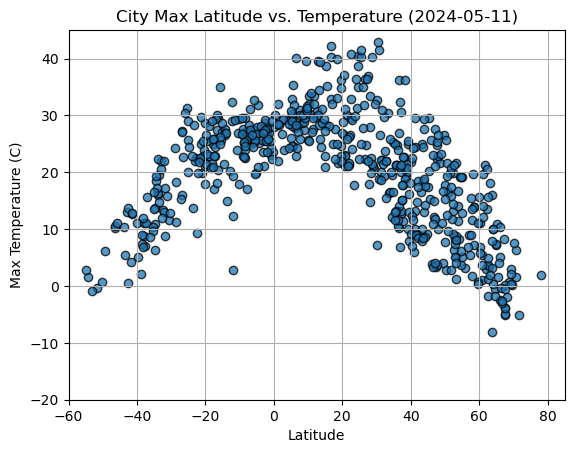

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60, 85)
plt.ylim(-20, 45)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1_BDC.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

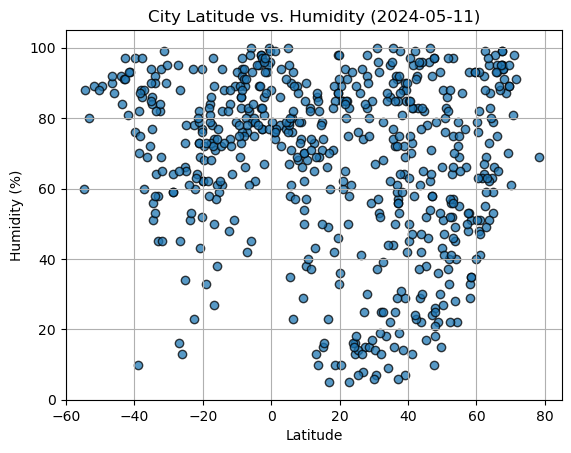

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 85)
plt.ylim(0, 105)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2_BDC.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

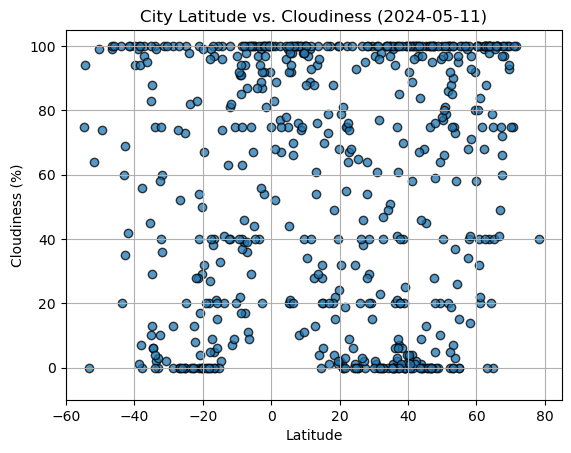

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 85)
plt.ylim(-10, 105)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3_BDC.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

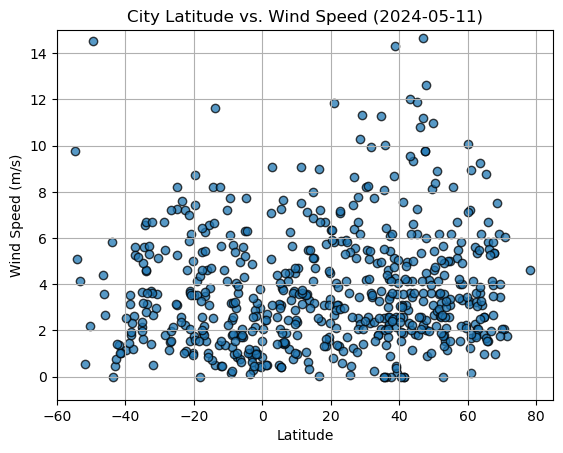

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-05-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60, 85)
plt.ylim(-1, 15)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4_BDC.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, slope * x + intercept, color='red')
    
    if slope < 0:
        text_position = (0.05, 0.25)
    else:
        text_position = (0.05, 0.75)

    plt.text(*text_position, f'y = {slope:.2f}x + {intercept:.2f}', color='red', fontsize=14, transform=plt.gca().transAxes)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    print("The r-value is: " + str(r_value))
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,martinsville,36.6915,-79.8725,10.25,91,2,2.15,US,2024-05-12 10:38:46
4,xinyuan,37.3000,99.0000,12.59,19,7,6.08,CN,2024-05-12 10:38:46
5,bembereke,10.2283,2.6634,33.34,38,100,2.36,BJ,2024-05-12 10:34:03
6,ust-nera,64.5667,143.2000,-0.58,63,79,1.86,RU,2024-05-12 10:33:39
8,badger,64.8000,-147.5333,7.27,59,0,2.57,US,2024-05-12 10:30:30


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.98,EC,2024-05-12 10:32:55
1,uturoa,-16.7333,-151.4333,27.37,74,5,6.26,PF,2024-05-12 10:35:14
3,port alfred,-33.5906,26.8910,19.54,64,2,3.13,ZA,2024-05-12 10:33:58
7,margaret river,-33.9500,115.0667,15.92,92,100,4.59,AU,2024-05-12 10:29:34
9,papatowai,-46.5619,169.4708,10.19,90,99,4.41,NZ,2024-05-12 10:32:55


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.782644300733893


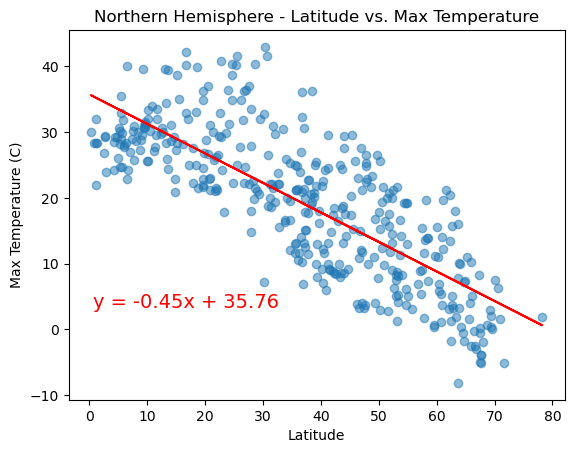

In [40]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       xlabel="Latitude", ylabel="Max Temperature (C)", 
                       title="Northern Hemisphere - Latitude vs. Max Temperature")

The r-value is: 0.7761847179579734


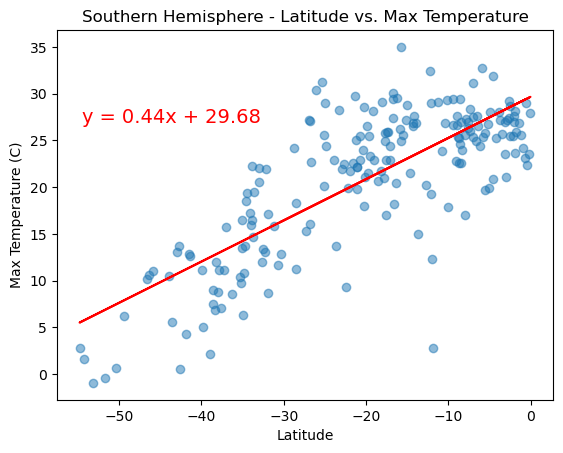

In [41]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       xlabel="Latitude", ylabel="Max Temperature (C)", 
                       title="Southern Hemisphere - Latitude vs. Max Temperature")

**Discussion about the linear relationship:** 

#### Max Temperature vs. Latitude Linear Regression Conclusions

These linear regression models show that there is a strong negative linear relationship between latitude and humidity in the Northern Hemisphere, and a strong positive linear relationship between latitude and humidity in the Southern Hemisphere. Essentially, max temperature decreases as you move away from the equator towards the poles. The intercepts represent the expected max temperatures at the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.038407794969718856


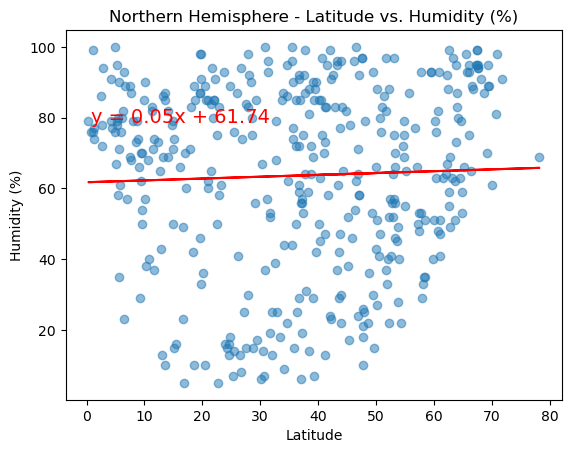

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       xlabel="Latitude", ylabel="Humidity (%)", 
                       title="Northern Hemisphere - Latitude vs. Humidity (%)")

The r-value is: 0.09902802334967814


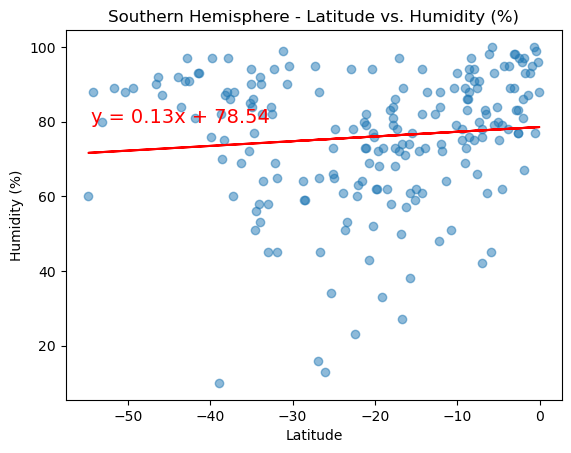

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       xlabel="Latitude", ylabel="Humidity (%)", 
                       title="Southern Hemisphere - Latitude vs. Humidity (%)")

**Discussion about the linear relationship:** 

#### Humidity vs. Latitude Linear Regression Conclusions

These linear regression models show how humidity changes as latitude changes. In the Northern Hemisphere, the positive slope suggests that there is a slight increase in humidity as latitude increases, and the intercept represents the expected humidity when latitude is at its minimum. The r-value indicates a weak positive correlation between humidity and latitude, suggesting that while there may be a slight tendency for humidity to increase with increasing latitude, the relationship is not very strong.

Interestingly, in the Southern Hemisphere, the relationship is symmetrical when compared to its Northern brother. The positive slope suggests that there is a also a slight increase in humidity as latitude increases, and the intercept represents the expected humidity when latitude is furthest from the equator. However, the r-value for the Southern Hemisphere reinforces the conclusion that the correlation between humidity and latitude is very weak. This suggests that latitude alone may not be a good predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06967376182663874


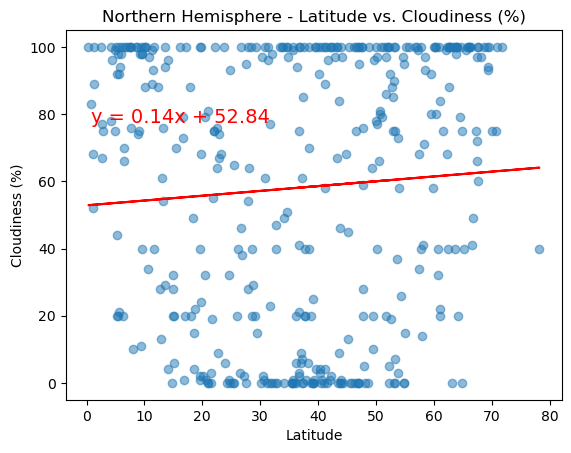

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       xlabel="Latitude", ylabel="Cloudiness (%)", 
                       title="Northern Hemisphere - Latitude vs. Cloudiness (%)")

The r-value is: 0.11614078171282967


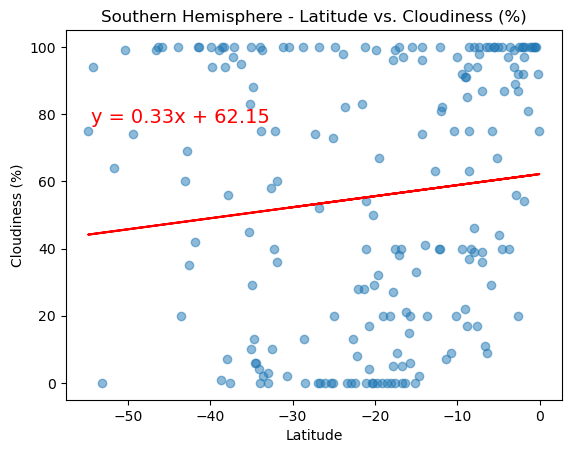

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       xlabel="Latitude", ylabel="Cloudiness (%)", 
                       title="Southern Hemisphere - Latitude vs. Cloudiness (%)")

**Discussion about the linear relationship:** 

#### Cloudiness vs. Latitude Linear Regression Conclusions

These linear regression models models how cloudiness changes as latitude changes. The relationship between cloudiness and latitude is much the same as the relationship between humidity and latitude. For both the Northern and Southern Hemisphere models, cloudiness tends to increase as latitude increases. Also, the correllary relationship is stronger in the Southern Hemisphere than in the Northern. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06163312267279851


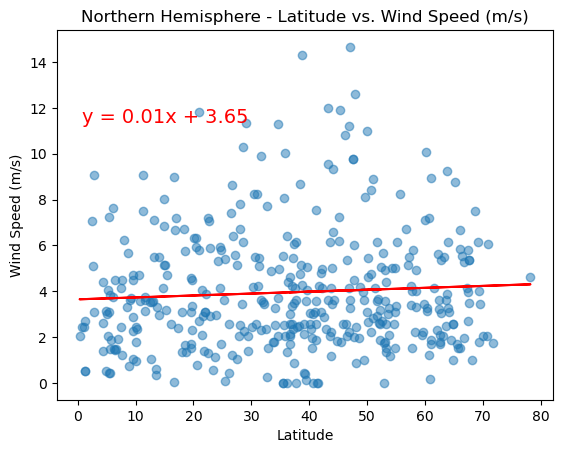

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       xlabel="Latitude", ylabel="Wind Speed (m/s)", 
                       title="Northern Hemisphere - Latitude vs. Wind Speed (m/s)")

The r-value is: -0.15947185495152186


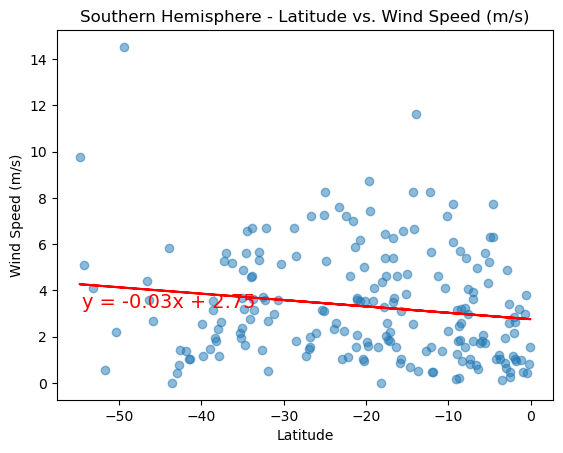

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       xlabel="Latitude", ylabel="Wind Speed (m/s)", 
                       title="Southern Hemisphere - Latitude vs. Wind Speed (m/s)")

**Discussion about the linear relationship:** 

The linear regression models displaying Wind Speed vs. Latitude for the Northern and Southern Hemispheres both show a slope that is almost zero. The zero slope indicates that the changes in latitude do not reliably predict or cause the change in wind speed in a liner manner. While both hemispheres displayed near-zero values for the slope, the slightly higher negative value for the Southern Hemisphere indicates that the changes in wind speed versus latitude are more significant than in the Nothern hemisphere.